In [51]:
from pathlib import Path

In [52]:
from datetime import datetime, date
import matplotlib.pyplot as plt


# Initializing:

You can set ``first_interval`` to your birthday, then you have nice stats for every year.. You can skip last interval and it will assume you stayed at the last location you have photos of.

In [53]:
from where import src
import importlib

# I use this notebook to modify the library, you can skip the reload..
importlib.reload(src)

when = src.When(
    last_interval=datetime(2020, 12, 31),
    feather_location=Path('photos-limited.feather').resolve(),
    pictures_root=[
        Path('/Users/visgean/Dropbox/Photos/2018').resolve(),
        Path('/Users/visgean/Dropbox/Photos/2019').resolve(),
        Path('/Users/visgean/Dropbox/Photos/2020').resolve(),
    ],
    processes=5,
    exclude_countries=('SJ', 'GH', 'RS')
)

# Example plots

below you can see some example plots, they are badly formatted, if you know solution to that please feel free to contact me via email or pull request..

<AxesSubplot: ylabel='admin2'>

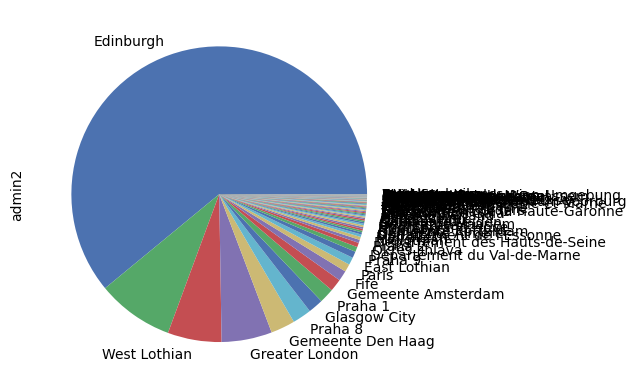

In [54]:
when.countries_df.admin2.value_counts().plot(kind='pie')


<AxesSubplot: ylabel='cc'>

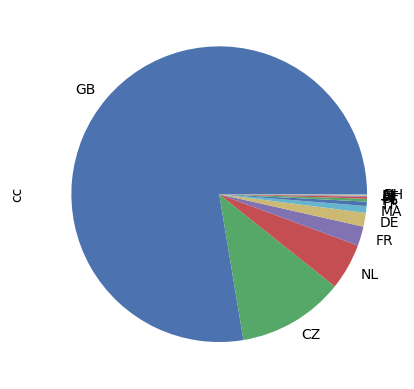

In [55]:
when.countries_df.cc.value_counts().plot(kind='pie')

/var/folders/t9/wn516khd6p1b9l2g2lmm4qh40000gn/T/ipykernel_38688/4185281774.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
/var/folders/t9/wn516khd6p1b9l2g2lmm4qh40000gn/T/ipykernel_38688/4185281774.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  when.day_df['country_code'].hist(by=when.day_df.index.year, ax=ax, rwidth=0.5)


array([[<AxesSubplot: title={'center': '2017'}>,
        <AxesSubplot: title={'center': '2018'}>],
       [<AxesSubplot: title={'center': '2019'}>,
        <AxesSubplot: title={'center': '2020'}>]], dtype=object)

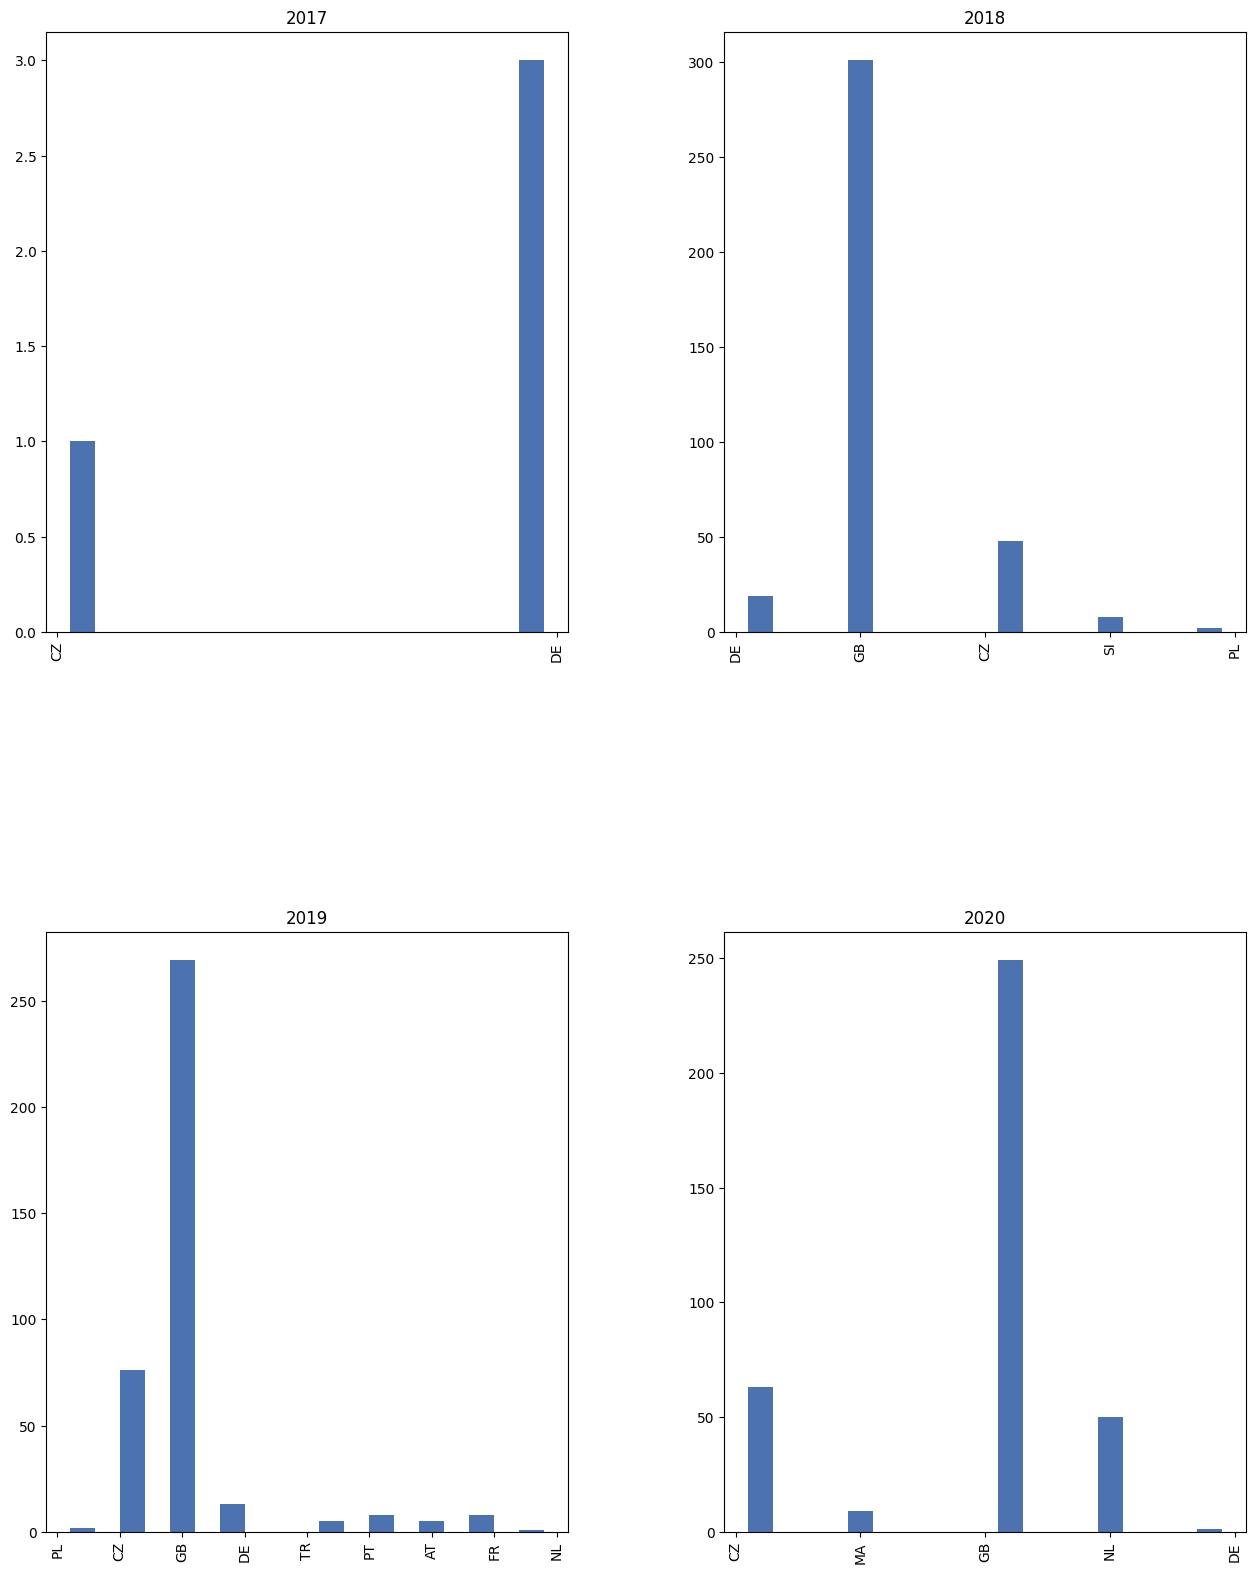

In [56]:
plt.style.use('seaborn-deep')
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

when.day_df['country_code'].hist(by=when.day_df.index.year, ax=ax, rwidth=0.5)

In [57]:
when.countries_df.cc.value_counts()

GB    4731
CZ     711
NL     309
FR     129
DE      92
MA      45
TR      29
PT      19
SI      13
AT       7
PL       6
GH       2
SJ       2
Name: cc, dtype: int64

# Get location day by day:

``.day_df`` is a dataframe that contains a row for every single day from ``first_interval`` to ``last_interval``. Country column sometimes contains wrong data - it can correspond to region sometimes.

In [58]:
when.day_df

,country,country_code
day,,
2017-12-29,Czech Republic,CZ
2017-12-29,Berlin,DE
2017-12-30,Berlin,DE
2017-12-31,Berlin,DE
2018-01-01,Berlin,DE
...,...,...
2020-12-27,Scotland,GB
2020-12-28,Scotland,GB
2020-12-29,Scotland,GB


# Interval list

In [59]:
when.intervals_df

,from,to,days,country,country_code
0,2017-12-29,2017-12-29,0,Czech Republic,CZ
1,2017-12-29,2018-01-13,15,Berlin,DE
2,2018-01-13,2018-05-23,129,Scotland,GB
3,2018-05-23,2018-06-10,17,Praha,CZ
4,2018-06-10,2018-06-15,5,Berlin,DE
5,2018-06-15,2018-06-20,4,Praha,CZ
6,2018-06-20,2018-06-20,0,England,GB
7,2018-06-20,2018-06-20,0,Central Bohemia,CZ
8,2018-06-20,2018-07-26,36,England,GB
9,2018-07-26,2018-08-02,6,Ljubljana,SI
